In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 授权登录，仅第一次的时候会鉴权
def login_google_drive():
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  return drive

# 列出id对应目录的所有文件
# "q" 查询条件教程详见：https://developers.google.com/drive/v2/web/search-parameters
def list_file(drive, dir_id_str):
  file_list = drive.ListFile({'q': dir_id_str+" in parents and trashed=false"}).GetList()
  for file1 in file_list:
    print('title: %s, id: %s, mimeType: %s' % (file1['title'], file1['id'], file1["mimeType"]))

def cache_data(file_id_str, file_name):
  # id 替换成上一步读取到的对应文件 id
  u_data = drive.CreateFile({'id': file_id_str}) 
  
  #这里的下载操作只是缓存，不会在你的Google Drive 目录下多下载一个文件
  u_data.GetContentFile(file_name, "text/plain")
  print("缓存成功")

def load_data(filename):
    titles = []
    print("正在加载数据...")
    with open(filename, "r") as f:
        for line in f.readlines():
            titles.append(line.strip())
            
    print("一共加载了 %s 个标题" % len(titles))

    return titles
  
drive = login_google_drive()
list_file(drive,"'1H0IikQLhQQ8etGEk86uBH8HHdQl7pg6I'")

#list_file(drive,"'116VaKZu0-lRgLAfaz94Aq9MmkirhBJ_y'")

In [0]:
filename = "hd40"
cache_data("1QkmI7bICXzyDM2RbtRzPSKyJcWUuRxH5",filename)
titles = load_data(filename)


# 1.对比BatchSize

备注：hd=20, LR:0.05, RR:0.001
<br>5个size：32、64、128、256、512


## 1.1收敛趋势对比

In [0]:
yy = []

for file in ["bs32", "bs64","bs128","bs256","bs512"]:
  print(file)
  with open(file, 'r') as f:
    y = []
    lines = f.readlines()
    for li in lines:
      value = [str(s) for s in li.split(', ')]
      if(value[0]=="('test_loss: '"):
          y.append(float(value[1]))
          #print(value[1])
    yy.append(y)      
#print((yy[2]))


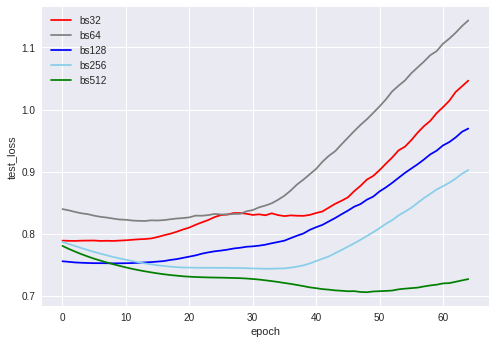

In [114]:
y0 = yy[0]
y1 = yy[1]
y2 = yy[2]
y3 = yy[3]
y4 = yy[4]
x = range(0,65)
#print(y)
plt.plot(x,y0[:65], color='red', label='bs32')
plt.plot(x,y1[:65], color='grey', label='bs64')
plt.plot(x,y2[:65], color='blue', label='bs128')
plt.plot(x,y3[:65], color='skyblue', label='bs256')
plt.plot(x,y4[:65], color='green', label='bs512')
plt.legend()    
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.show()

## 1.2 auc对比

In [0]:
bs_auc = []

for file in ["bs32", "bs64","bs128","bs256","bs512"]:
  print(file)
  with open(file, 'r') as f:
    y = []
    lines = f.readlines()
    for li in lines:
      value = [str(s) for s in li.split(', ')]
      if(value[0]=="('test_loss: '"):
          value11 = [str(s) for s in value[3].split(')')]
          y.append(float(value11[0]))
          #print(value11[0])
    bs_auc.append(y)

for byy in bs_auc:
  for i in range(len(byy),100):
    byy.append(1.0)
  print(len(byy))  

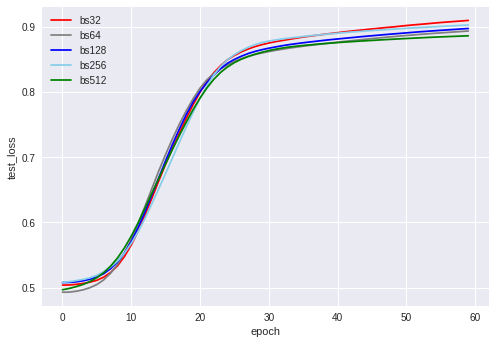

In [123]:
by0 = bs_auc[0]
by1 = bs_auc[1]
by2 = bs_auc[2]
by3 = bs_auc[3]
by4 = bs_auc[4]
bx = range(0,60)
#print(y)
plt.plot(bx,by0[:60], color='red', label='bs32')
plt.plot(bx,by1[:60], color='grey', label='bs64')
plt.plot(bx,by2[:60], color='blue', label='bs128')
plt.plot(bx,by3[:60], color='skyblue', label='bs256')
plt.plot(bx,by4[:60], color='green', label='bs512')
plt.legend()    
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.show()

# 2.对比Learning_rate

备注：hd=20，BatchSize:256, RR:0.001

## 2.1对比收敛趋势

In [0]:
lr_rv = []

for file in ["lr0.01", "lr0.02","lr0.03","lr0.1"]:
  print(file)
  with open(file, 'r') as f:
    y = []
    lines = f.readlines()
    for li in lines:
      value = [str(s) for s in li.split(', ')]
      if(value[0]=="('test_loss: '"):
          #value11 = [str(s) for s in value[3].split(')')]
          y.append(float(value[1]))
          #print(value11[0])
    lr_rv.append(y)

for lyy in lr_rv:
  for j in range(0,len(lyy)):
    print(lyy[j])
  for i in range(len(lyy),100):
    lyy.append(1.0)
  print(len(lyy))


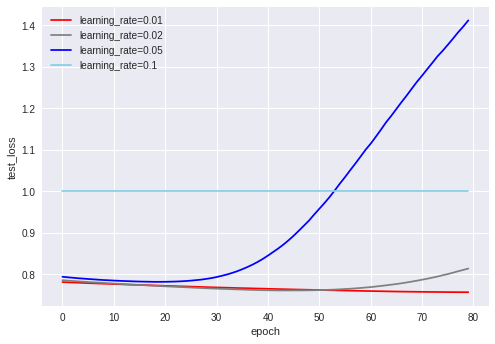

In [129]:
lvy0 = lr_rv[0]
lvy1 = lr_rv[1]
lvy2 = lr_rv[2]
lvy3 = lr_rv[3]
lvx = range(0,80)
#print(y)
plt.plot(lvx,lvy0[:80], color='red', label='learning_rate=0.01')
plt.plot(lvx,lvy1[:80], color='grey', label='learning_rate=0.02')
plt.plot(lvx,lvy2[:80], color='blue', label='learning_rate=0.05')
plt.plot(lvx,lvy3[:80], color='skyblue', label='learning_rate=0.1')
plt.legend()    
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.show()

## 2.2 对比auc

In [0]:
lr_auc = []

for file in ["lr0.01", "lr0.02","lr0.03","lr0.1"]:
  print(file)
  with open(file, 'r') as f:
    y = []
    lines = f.readlines()
    for li in lines:
      value = [str(s) for s in li.split(', ')]
      if(value[0]=="('test_loss: '"):
          value11 = [str(s) for s in value[3].split(')')]
          y.append(float(value11[0]))
          #print(value11[0])
    lr_auc.append(y)

for lyy in lr_auc:
  for i in range(len(lyy),100):
    lyy.append(1.0)
  print(len(lyy))

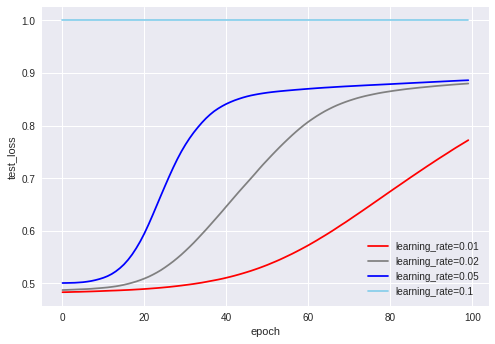

In [143]:
lay0 = lr_auc[0]
lay1 = lr_auc[1]
lay2 = lr_auc[2]
lay3 = lr_auc[3]
lax = range(0,100)
#print(y)
plt.plot(lax,lay0[:100], color='red', label='learning_rate=0.01')
plt.plot(lax,lay1[:100], color='grey', label='learning_rate=0.02')
plt.plot(lax,lay2[:100], color='blue', label='learning_rate=0.05')
plt.plot(lax,lay3[:100], color='skyblue', label='learning_rate=0.1')
plt.legend()    
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.show()

# 3.对比hidden_dims
备注：
- BatchSize=256：尽量充分利用内存
- LR=0.02：下调学习速率，能更好抓住最优解，之后考虑加入动态调节学习速率的方法
- RR=0.001：
- k=5000：充分调用数据

In [164]:
hd_rv = []
hd_auc = []
for file in ["lr0.01", "lr0.02","lr0.03","lr0.1"]:
  print(file)
  with open(file, 'r') as f:
    y_rv = []
    y_auc = []
    lines = f.readlines()
    for li in lines:
      value = [str(s) for s in li.split(', ')]
      if(value[0]=="('test_loss: '"):
          y_rv.append(float(value[1]))
          value11 = [str(s) for s in value[3].split(')')]
          y_auc.append(float(value11[0]))
          #print(value11[0])
    hd_rv.append(y_rv)
    hd_auc.append(y_auc)

for hyy in hd_rv:
  #for j in range(0,len(hyy)):
    #print(hyy[j])
  for i in range(len(hyy),35):
    hyy.append(1.0)
  #print(len(hyy))
  
for hyy in hd_auc:
  #for j in range(0,len(hyy)):
    #print(hyy[j])
  for i in range(len(hyy),35):
    hyy.append(1.0)
  #print(len(hyy))

lr0.01
lr0.02
lr0.03
lr0.1


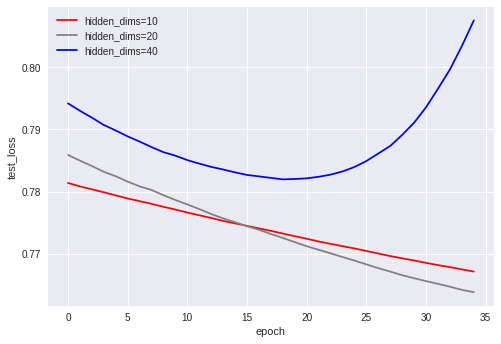

In [167]:
hvy0 = hd_rv[0]
hvy1 = hd_rv[1]
hvy2 = hd_rv[2]
hvy3 = hd_rv[3]
hvx = range(0,35)
#print(y)
plt.plot(hvx,hvy0[:35], color='red', label='hidden_dims=10')
plt.plot(hvx,hvy1[:35], color='grey', label='hidden_dims=20')
plt.plot(hvx,hvy2[:35], color='blue', label='hidden_dims=40')
#plt.plot(hvx,hvy3[:35], color='skyblue', label='hidden_dims=60')
plt.legend()    
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.show()

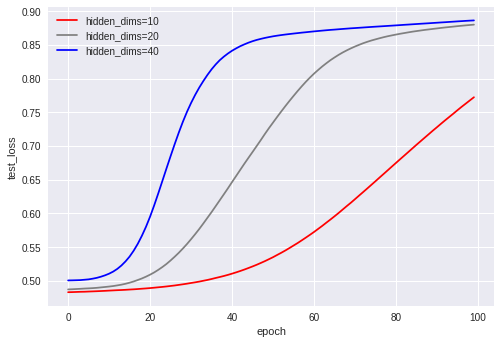

In [168]:
hay0 = hd_auc[0]
hay1 = hd_auc[1]
hay2 = hd_auc[2]
hay3 = hd_auc[3]
hax = range(0,100)
#print(y)
plt.plot(hax,hay0[:100], color='red', label='hidden_dims=10')
plt.plot(hax,hay1[:100], color='grey', label='hidden_dims=20')
plt.plot(hax,hay2[:100], color='blue', label='hidden_dims=40')
#plt.plot(hax,hay3[:100], color='skyblue', label='hidden_dims=60')
plt.legend()    
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.show()